# Sub Task 4

### Step 1: Import the data and check

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


### Step 2: Checking Missing Values

In [12]:
def missing_values_table(df):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(data)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical variables to numeric
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data into features and target
X = data.drop('y', axis=1)
y = data['y']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


### Correlation 

<Axes: >

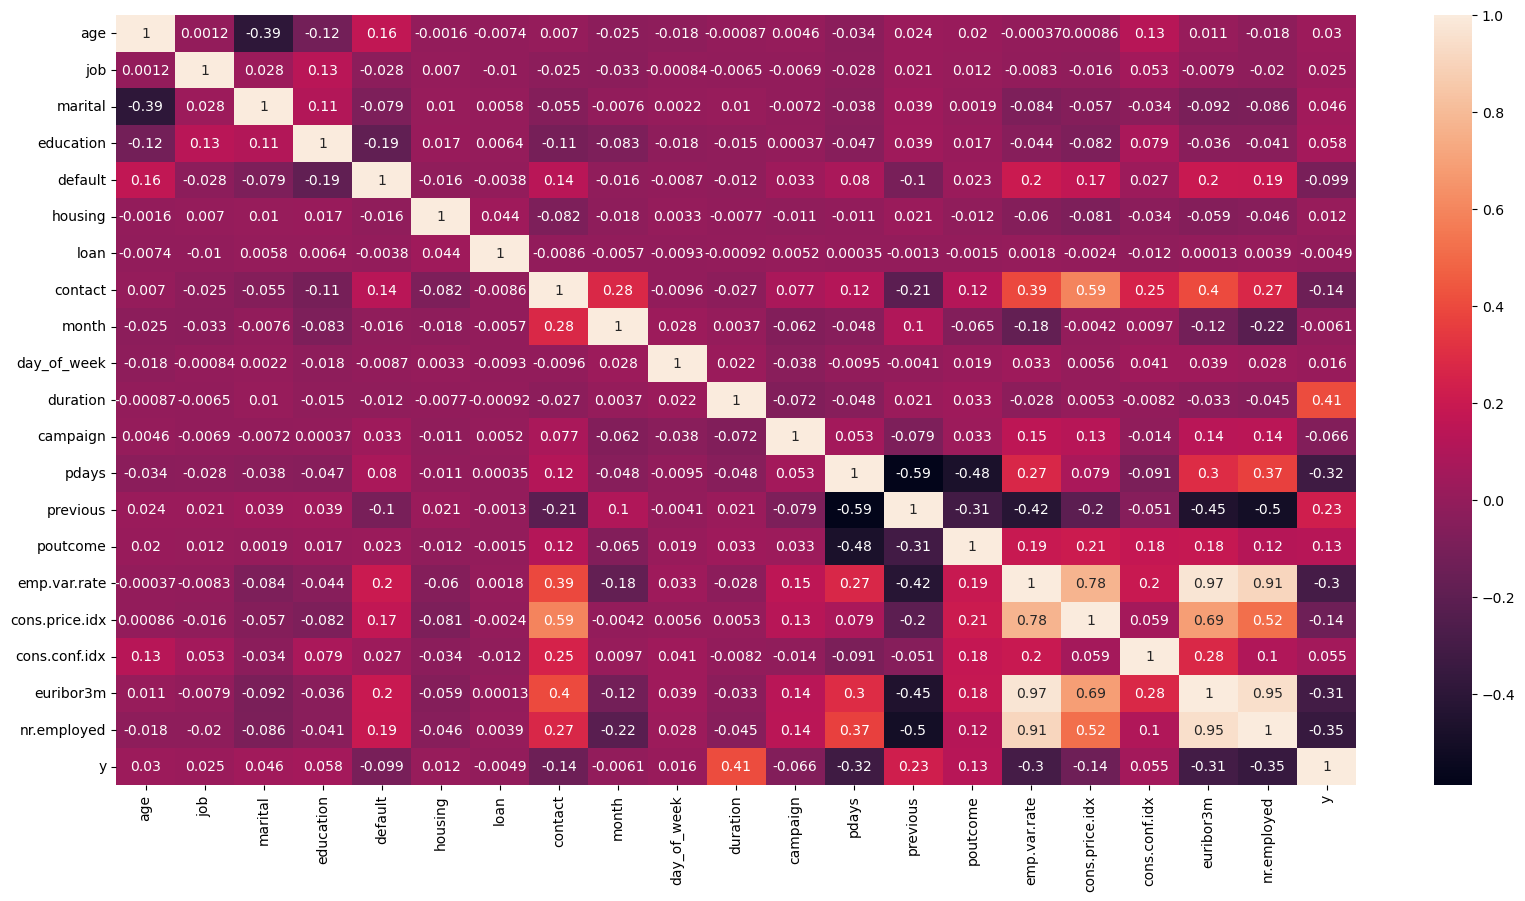

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

### Step 3: Comparison among different model approach

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = (accuracy, roc_auc)

    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, predictions))

Logistic Regression - Accuracy: 0.91, ROC AUC: 0.93
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Random Forest - Accuracy: 0.91, ROC AUC: 0.94
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

Gradient Boosting - Accuracy: 0.92, ROC AUC: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.69      0.52      0.60       935

    accuracy                      

 Before class balance the Gradient Boosting was showing better result

### Step 4: Class Balance Check:

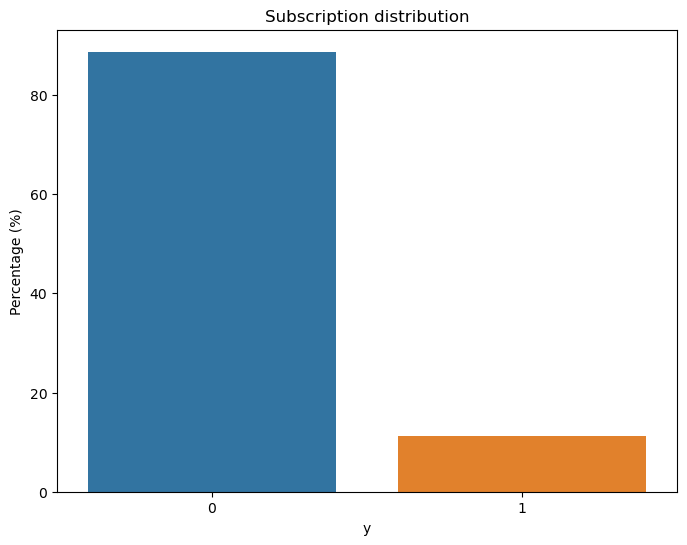

0    88.734583
1    11.265417
Name: y, dtype: float64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Checking class balance
class_counts = data['y'].value_counts(normalize=True) * 100
# Visualizing class balance
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Subscription distribution')
plt.xlabel('y')
plt.ylabel('Percentage (%)')
plt.show()
class_counts

In [19]:
#Balancing the DATASET with SMOTE.
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### Step 5: Comparison after Balancing

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = (accuracy, roc_auc)

    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, predictions))


Logistic Regression - Accuracy: 0.85, ROC AUC: 0.93
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7303
           1       0.43      0.88      0.58       935

    accuracy                           0.85      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.85      0.87      8238

Random Forest - Accuracy: 0.90, ROC AUC: 0.94
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7303
           1       0.56      0.66      0.60       935

    accuracy                           0.90      8238
   macro avg       0.76      0.80      0.77      8238
weighted avg       0.91      0.90      0.91      8238

Gradient Boosting - Accuracy: 0.89, ROC AUC: 0.94
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7303
           1       0.51      0.83      0.64       935

    accuracy                      

Now Random Forrest Classifier showing better result.

### Step 6: Hypermeter Tuning for better performance

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
    
}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=3, scoring='f1', n_jobs=-1)

# Perform the search on the resampled data
grid_search.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

### Step 7: Predict on the test data

In [27]:

y_pred = grid_search.predict(X_test)

# Print performance metrics
print("Best parameters:", grid_search.best_params_)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test set accuracy: 0.9043457149793639
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7303
           1       0.56      0.68      0.62       935

    accuracy                           0.90      8238
   macro avg       0.76      0.81      0.78      8238
weighted avg       0.91      0.90      0.91      8238



### Step 8: Pipeline

In [26]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Justification of Model Choice and Parameters
### 1. Model Selection:

  ##### RandomForest Classifier: 
  I chose RandomForest due to its robustness and ability to handle both bias and variance efficiently. RandomForest is known for performing well on classification tasks because it constructs multiple decision trees during training and outputs the mode of the classes (classification) of the individual trees, which reduces overfitting and improves generalization.
##### Parameters: 
The optimal parameters found were {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}.
##### max_depth:
None suggests that deeper trees were better for capturing complex patterns in the dataset, allowing the trees to expand until all leaves are pure or contain less than min_samples_split samples.
###### min_samples_leaf: 1 and min_samples_split: 2 
indicate that having the minimal split criteria helped in achieving finer granularity in classification.
###### n_estimators: 
300 implies that a higher number of trees in the forest provided a better ensemble to average out biases and reduce the variance in predictions.
### 2. Hyperparameter Tuning:

Hyperparameter tuning was performed using GridSearchCV, which exhaustively considered all parameter combinations provided. This approach ensures that the model was optimized for the highest accuracy by evaluating numerous variations of the parameters.
# Evaluation of Model Performance
### 1. Accuracy and Other Metrics:
1. Accuracy of 90.4% on the test set is quite high, indicating that the model is effective in predicting whether individuals will subscribe to the banking product.
2. Precision for Class 1 (subscribers) was relatively low at 56%, which means that while the model can identify potential subscribers, it also misclassifies a significant number of non-subscribers as subscribers.
3. Recall for Class 1 at 68% is satisfactory, showing that out of all actual subscribers, the model correctly identifies 68% of them. This is crucial for the bank as it means the model is relatively good at capturing potential customers.
### 2. F1-Score:

The F1-score for the subscribers (Class 1) was 62%, which balances precision and recall and is a more precise reflection of the model's effectiveness for this class than accuracy alone.
# Discussion on Model’s Business Implications
### 1. Targeting Efficiency:

The model effectively identifies a large proportion of potential subscribers (recall), which can significantly optimize marketing efforts by focusing resources on individuals more likely to subscribe.
However, the precision for subscribers is moderately low, suggesting that the bank may still contact many individuals who will not subscribe. Efforts to improve precision should be considered in future iterations.
### 2. Cost-Benefit Analysis:

Implementing this model could reduce costs associated with indiscriminate marketing campaigns by narrowing the focus to leads more likely to convert.
Further analysis could be conducted to determine the break-even point for the model's precision and recall trade-offs in the context of campaign costs and revenue generated from new subscribers.
# Suggestions for Future Improvements
##### Feature Engineering: 
More sophisticated features or interactions between features could be explored to improve model sensitivity.
##### Model Ensembling: 
Combining predictions from multiple models could enhance both precision and recall.
##### Cost-Sensitive Learning: 
Adjusting the model to penalize false positives more could help in improving the precision without drastically sacrificing recall.
# Conclusion
Overall, my machine learning model performs well in identifying potential subscribers to the bank's product, with robust accuracy and satisfactory recall. The implications for targeted marketing efforts could be substantial, offering a reduction in costs and more effective campaign management. However, there is room for improvement, particularly in increasing precision to reduce the number of false positives.

## References:
    #1.Wang, X.W. and Liu, Y.Y., 2020. Comparative study of classifiers for human microbiome data. Medicine in microecology, 4, p.100013.
    #2.Hou, S., Cai, Z., Wu, J., Du, H. and Xie, P., 2022. Applying Machine Learning to the Development of Prediction Models for Bank Deposit Subscription. International Journal of Business Analytics (IJBAN), 9(1), pp.1-14
    #3.Hutter, F., Kotthoff, L. and Vanschoren, J., 2019. Automated machine learning: methods, systems, challenges. Springer Nature.
    #4.Dong, X., Yu, Z., Cao, W., Shi, Y. and Ma, Q., 2020. A survey on ensemble learning. Frontiers of Computer Science, 14, pp.241-258.
    #5. Phansekar, H. (2020) BANK_DATASET_ANALYSIS-bank-full.csv-/readme.md at main · Harshalphansekar/BANK_DATASET_ANALYSIS-bank-full.csv-, GitHub. Available at: https://github.com/HarshalPhansekar/BANK_DATASET_ANALYSIS-bank-full.csv-/blob/main/README.md (Accessed: 10 May 2024). 
    
